In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
!pwd

/content/drive/My Drive/Colab Notebooks/DSCT/NLP/Quora/pkl file


In [134]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora


In [135]:
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score
import joblib

In [136]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/QPS/QPS 60000.xlsx")

In [137]:
df.head(2000)

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0
...,...,...,...
1995,"I am visiting Sri Lanka soonfor 9 days, how ca...",Do Indians hate Sri Lankans?,0.0
1996,What are some good examples of 4 stanza poems?,What are some good Ilocano poems?,0.0
1997,Which CPU is better I3 4th Gen or 6th Gen?,Which is better intel i5 (6th gen) or i7 (5th ...,0.0
1998,What are some of the best tourist places to vi...,Where are the foremost tourist places in Chhat...,1.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   question1     60000 non-null  object 
 1   question2     60000 non-null  object 
 2   is_duplicate  60000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
df['is_duplicate'].value_counts()

0.0    37600
1.0    22400
Name: is_duplicate, dtype: int64

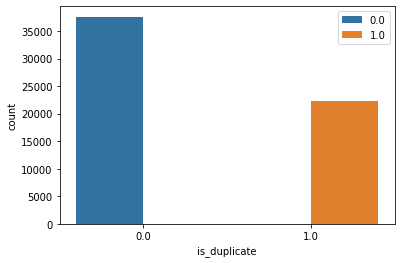

In [ ]:
sns.countplot(x="is_duplicate",hue="is_duplicate",data=df)
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
df.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [ ]:
#Model_Evaluation FUN

from sklearn.metrics import  precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
def model_Eval(y_test,y_Pred):
  acc=accuracy_score(y_test,y_pred)
  print("Accuracy:- ",acc)
  print("Error rate:- ",1-acc)
  print("Precission :- ",precision_score(y_test,y_pred,average='weighted'))
  print("Recall :-",recall_score(y_test,y_pred,average='weighted'))
  print("F1 score:- ",f1_score(y_test,y_pred,average='weighted'))

  # Confusion Matrix
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  plt.figure(figsize=(10,5))
  sns.heatmap(cm,annot=True,fmt='.3g')
  plt.xlabel('Predicted')
  plt.ylabel("Actual")

In [139]:
nltk.download('stopwords')
lemmatizer=WordNetLemmatizer()
stop_word=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
q1=df['question1']
q2=df['question2']

In [141]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def text_cleaner(df):
  corpus=[]
  for i in range(len(df)):
    #remove all other char except a-z and A-Z
    sent=re.sub('[^a-zA-Z]',' ',df[i])

    # convert into lower Casing
    sent=sent.lower()

    # lemmatizer
    sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])

    # Remove Stopword
    sent=" ".join([word for word in str(sent).split() if(word not in stop_word)])
    corpus.append(sent)
  return corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [142]:
corpus1=text_cleaner(q1)
corpus2=text_cleaner(q2)

In [143]:
corpus1[:5]

['step step guide invest share market india',
 'story kohinoor koh noor diamond',
 'increase speed internet connection using vpn',
 'mentally lonely solve',
 'one dissolve water quikly sugar salt methane carbon di oxide']

In [144]:
corpus2[:5]

['step step guide invest share market',
 'would happen indian government stole kohinoor koh noor diamond back',
 'internet speed increased hacking dns',
 'find remainder math math divided',
 'fish would survive salt water']

In [145]:
type(corpus2)

list

In [146]:
df.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [147]:
# Lemmatizer + TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)
X1=cv.fit_transform(corpus1).toarray()
X2=cv.fit_transform(corpus2).toarray()
X=np.concatenate((X1,X2),axis=1)
#output
y=df['is_duplicate']

In [148]:
X.shape

(60000, 6000)

In [149]:
questions = list(corpus1) + list(corpus2)

In [ ]:
questions

In [ ]:
# X2.shape

In [ ]:
X.shape

(60000, 6000)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# temp_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [ ]:
# type(X)

In [ ]:
# temp_df1=pd.DataFrame(X1,columns=cv.get_feature_names_out())
# temp_df2=pd.DataFrame(X2,columns=cv.get_feature_names_out())

In [ ]:
# temp_df1.to_csv('QPS_tempdf.csv',index=False)
# temp_df2.to_csv('QPS_tempdf.csv', mode='a',index=False)

In [ ]:
# train_df = pd.concat([temp_df1, temp_df2], axis=1)

In [ ]:
# X=train_df

In [ ]:
# split data into traning and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (48000, 6000)
X_test:- (12000, 6000)
y_train:- (48000,)
y_test:- (12000,)


Model created
Model trained
find y_pred
Accuracy:-  0.7510833333333333
Error rate:-  0.24891666666666667
Precission :-  0.7472779662985866
Recall :- 0.7510833333333333
F1 score:-  0.7429321254149324
[[6514  972]
 [2015 2499]]


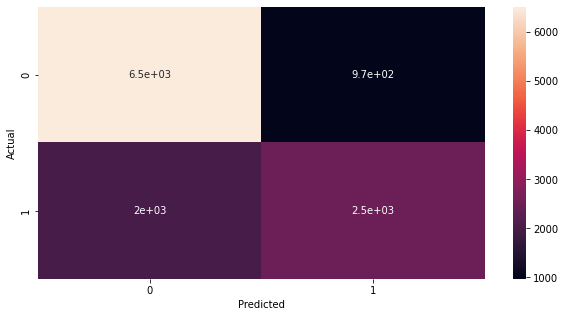

In [ ]:
# randomeForesrtClasiifier

from sklearn.ensemble import RandomForestClassifier

#model creation
ML_Model=RandomForestClassifier()
print("Model created")

#model traning
ML_Model.fit(X_train,y_train)
print("Model trained")

#find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# Model Evaluation
model_Eval(y_test,y_pred)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora/pkl file

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora/pkl file


In [ ]:
import joblib
joblib.dump(ML_Model,"ML_Model.pkl")
print("saved")

NameError: ignored

In [ ]:
!pwd

/content


In [ ]:
joblib.dump(cv,"cv.pkl")
print("saved")

saved


#Prediction

In [153]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora/pkl file

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora/pkl file


In [154]:
ML_model=joblib.load("ML_Model.pkl")
CV_model=joblib.load("cv.pkl")

In [155]:
q1="Where is the capital of India?"
q2="Where is the capital of India?"

In [156]:
lemmatizer=WordNetLemmatizer()
stop_word=set(stopwords.words('english'))

In [157]:
def text_cleaner1(text):
  corpus=[]
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-Z]',' ',text)
  # convert into lower Casing
  sent=sent.lower()
  # lemmatizer
  sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])
  # Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_word)])
  corpus.append(sent)
  return corpus

In [158]:
cleanedQ1=text_cleaner1(q1)
cleanedQ2=text_cleaner1(q2)

In [159]:
cleanedQ1

['capital india']

In [160]:
cleanedQ2

['business capital india']

In [161]:
#vectorize cleaned news
cvQ1=CV_model.transform(cleanedQ1).toarray()
cvQ2=CV_model.transform(cleanedQ2).toarray()

In [162]:
X=np.concatenate((cvQ1,cvQ2),axis=1)

In [163]:
X.shape

(1, 6000)

In [164]:
pred=ML_model.predict(X)

In [165]:
pred

array([0.])

In [166]:
if(pred==1):
  result="{} :- Question is same"
else:
	result="{} :- Question is not same"

In [167]:
print(result)

{} :- Question is not same
